<a href="https://colab.research.google.com/github/Brandon-Bernal-Alarcon/Machine-Learnign-Proyects/blob/main/Aplicaciones_python/Laboratorio_AS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Laboratorio: Modelos Supervisados y Generalización

Este notebook está basado en el Laboratorio 2 del curso Applied Machine Learning in Python de la University of Michigan (Coursera).

El contenido original ha sido reestructurado, comentado y ampliado con fines educativos y de portafolio, agregando:

- Contexto teórico

- Justificación de decisiones de modelado

- Visualizaciones adicionales

- Observaciones y conclusiones propias

El objetivo es demostrar comprensión práctica de Machine Learning supervisado, no redistribuir material evaluativo.

##Introducción

El aprendizaje supervisado es una de las ramas fundamentales del Machine Learning, en este laboratorio se estudia cómo la complejidad del modelo y la regularización afectan la capacidad de generalización de distintos algoritmos.

En particular, se analizarán:

- Underfitting y overfitting

- Regresión polinomial

- Regularización L1 (Lasso)

- Árboles de decisión

- Support Vector Machines (SVM)

## Generación y exploración del conjunto de datos


Para los experimentos de regresión se utiliza un conjunto de datos sintético, definido por la relación:

$$ y = sin(x) + \frac{x}{6} + ε$$

El ruido ε permite simular datos reales y estudiar el fenómeno de sobreajuste.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib notebook
%matplotlib inline

np.random.seed(0)
n = 15
x = np.linspace(0,10,n) + np.random.randn(n)/5
y = np.sin(x)+x/6 + np.random.randn(n)/10


X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=0)

El conjunto es pequeño, lo que incrementa el riesgo de overfitting, la relación no es estrictamente lineal

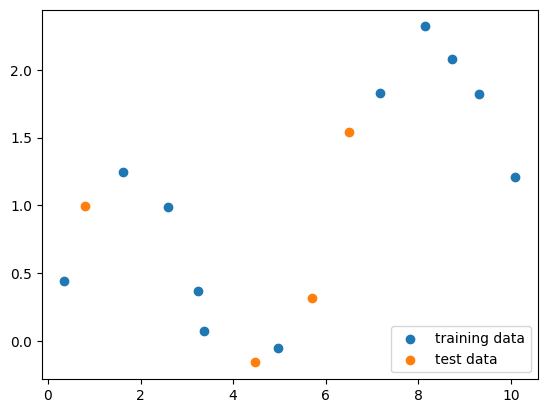

In [ ]:
plt.figure()
plt.scatter(X_train, y_train, label='training data')
plt.scatter(X_test, y_test, label='test data')
plt.legend(loc=4);

## Regresión polinomial y complejidad del modelo

Se entrena una regresión lineal sobre características polinomiales de grado 0 a 9 para estudiar cómo cambia el desempeño del modelo al aumentar su complejidad.

Para este aaprtado se busca entrenar una serie de modelos de regresión lineal sobre características polinomiales con grados que van de 0 a 9, y evaluar su desempeño utilizando el coeficiente de determinación 𝑅^2 tanto en el Conjunto de entrenamiento como el Conjunto de prueba. Esto nos permitirá, identificar modelos que infraajustan, detectar modelos que sobreajustan y seleccionar un grado con buena generalización

La regresión polinomial modela la relación entre la variable explicativa 𝑥 y la variable respuesta 𝑦 como:

$$ y = β_0 + β_1x_1+β_2x^2 + ... + β_nx^n + ϵ$$


donde:

$n$ es el grado del polinomio

ε es el término de error

Aunque el modelo es lineal en los parámetros, no es lineal en la variable original, lo que permite capturar relaciones no lineales.

Para cada grado
𝑑
∈
{
0
,
1
,
…
,
9
}
d∈{0,1,…,9}:

- Transformamos la variable
𝑥
x en características polinomiales

- Ajustamos un modelo LinearRegression

- Calculamos el
𝑅^2
 en: Datos de entrenamiento y Datos de prueba

- Almacenamos los resultados para su análisis posterior

In [ ]:
def answer_one():

    # Importamos Librerias
    from sklearn.linear_model import LinearRegression
    from sklearn.preprocessing import PolynomialFeatures
    import numpy as np
    import pandas as pd
    import matplotlib.pyplot as plt
    from sklearn.model_selection import train_test_split

    #Fijamos semillas
    np.random.seed(0)

    # Definimos nuestra muestra
    n = 15
    x = np.linspace(0,10,n) + np.random.randn(n)/5
    y = np.sin(x)+x/6 + np.random.randn(n)/10

    # Dividimos la muestra en 75% entrenamiento y 25% de prueba
    X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=0)

    # Asignamos los grados de libertad para el polinomio
    grados = [1,3,6,9]

    # Creamos la matriz de resultados por cada grado de libertad
    matriz_prediccion = np.zeros((4,100))

    # Creamos una malla en forma de vector columna con .reshape(-1,1) y hacemos una particion en el intervalo (0,10) de 100 valores
    x_malla = np.linspace(0, 10, 100).reshape(-1, 1)

    # Creamos un ciclo for para generar cada resultado en la matriz

    # enumerate(grados) crea un par ordenado, asignando un indice i ={0,1,2,3} y grados = {1,3,6,9}
    for i, grados in enumerate(grados):

        # Asignamos el polinomio con grado n al polinimo con [1,x,x^2,...,x^n]
        polinomio = PolynomialFeatures(degree=grados)

        # Entrenamos el modelo con el polinimo
        X_train_modelo = polinomio.fit_transform(X_train.reshape(-1, 1))

        # Transformamos la malla de valores con el modelo entrenado
        x_malla_modelo = polinomio.transform(x_malla)

        # Ajuste del modelo
        modelo = LinearRegression()
        modelo.fit(X_train_modelo, y_train)

        # Predicciones
        matriz_prediccion[i, :] = modelo.predict(x_malla_modelo)

    return matriz_prediccion


In [ ]:
answer_one()

array([[ 2.53040195e-01,  2.69201547e-01,  2.85362899e-01,
         3.01524251e-01,  3.17685603e-01,  3.33846955e-01,
         3.50008306e-01,  3.66169658e-01,  3.82331010e-01,
         3.98492362e-01,  4.14653714e-01,  4.30815066e-01,
         4.46976417e-01,  4.63137769e-01,  4.79299121e-01,
         2.30466539e+00,  2.28363550e+00,  2.25186568e+00,
         2.21099185e+00,  2.16299262e+00,  2.11012668e+00,
         2.05484037e+00,  1.99964084e+00,  1.94692951e+00,
         1.89879053e+00,  1.85672828e+00,  1.82134765e+00,
         1.79197039e+00,  1.76618046e+00,  1.73929077e+00,
         1.70372326e+00,  1.64829388e+00,  1.55739354e+00,
         1.41005537e+00]])

## Visualización del desempeño

Para interpretar correctamente los resultados, es fundamental visualizar cómo cambia el desempeño al aumentar la complejidad del modelo.

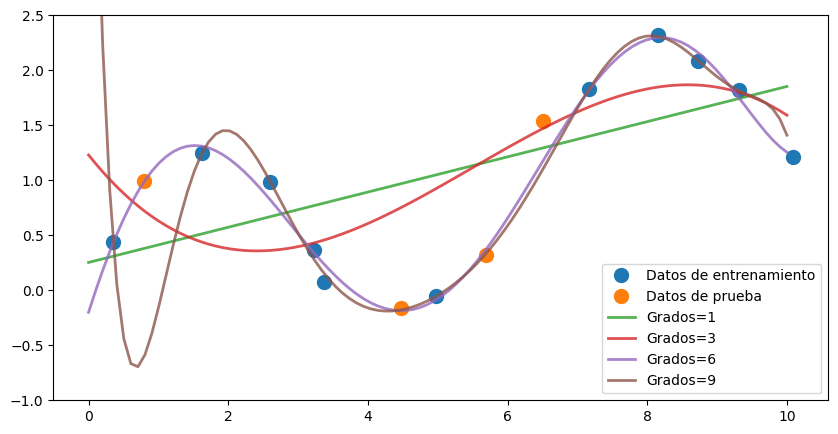

In [ ]:
# feel free to use the function plot_one() to replicate the figure
# from the prompt once you have completed question one
def plot_one(degree_predictions):
    plt.figure(figsize=(10,5))
    plt.plot(X_train, y_train, 'o', label='Datos de entrenamiento', markersize=10)
    plt.plot(X_test, y_test, 'o', label='Datos de prueba', markersize=10)
    for i,degree in enumerate([1,3,6,9]):
        plt.plot(np.linspace(0,10,100), degree_predictions[i], alpha=0.8, lw=2, label='Grados={}'.format(degree))
    plt.ylim(-1,2.5)
    plt.legend(loc=4)

plot_one(answer_one())


Una vez entrenados múltiples modelos con distintos niveles de complejidad, es fundamental medir objetivamente su desempeño.
En regresión, una de las métricas más utilizadas es el coeficiente de determinación, denotado como $R^2$

Para cada grado
𝑑
∈
{
0
,
1
,
…
,
9
}


- Crear características polinomiales

- Ajustar un modelo LinearRegression

- Calcular $R^2$ en entrenamiento

- Calcular $R^2$ en prueba

- Almacenar los resultados en arreglos

In [ ]:
def answer_two():

      # Importamos Librerias
    from sklearn.linear_model import LinearRegression
    from sklearn.preprocessing import PolynomialFeatures
    import numpy as np
    import pandas as pd
    import matplotlib.pyplot as plt
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import r2_score

    #Fijamos semillas
    np.random.seed(0)

    # Definimos nuestra muestra
    n = 15
    x = np.linspace(0,10,n) + np.random.randn(n)/5
    y = np.sin(x)+x/6 + np.random.randn(n)/10

    # Dividimos la muestra en 75% entrenamiento y 25% de prueba
    X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=0)

    # Asignamos los grados de libertad para el polinomio, de 0 a 9 (10 grados en total)
    grados = np.arange(10) # Grados de 0 a 9

    r2_train = np.zeros(10)
    r2_test = np.zeros(10)

    # Creamos un ciclo for para generar cada R^2
    for i, grado in enumerate(grados):

        # Asignamos el polinomio con grado n al polinimo con [1,x,x^2,...,x^n]
        polinomio = PolynomialFeatures(degree=grado)

        # Entrenamos el modelo con el polinimo, reshaped a 2D
        X_train_modelo = polinomio.fit_transform(X_train.reshape(-1, 1))
        X_test_modelo = polinomio.transform(X_test.reshape(-1, 1)) # Transformamos X_test también

        # Ajuste del modelo
        modelo = LinearRegression()
        modelo.fit(X_train_modelo, y_train)

        # Calcular R^2 para los datos de entrenamiento y prueba
        r2_train[i] = modelo.score(X_train_modelo, y_train)
        r2_test[i] = modelo.score(X_test_modelo, y_test)

    return r2_train, r2_test


In [ ]:
answer_two()

(array([0.        , 0.42924578, 0.4510998 , 0.58719954, 0.91941945,
        0.97578641, 0.99018233, 0.99352509, 0.99637545, 0.99803706]),
 array([-0.47808642, -0.45237104, -0.06856984,  0.00533105,  0.73004943,
         0.87708301,  0.9214094 ,  0.92021504,  0.63247948, -0.64525365]))

Interpretación

- A medida que aumenta el grado:

- El R² de entrenamiento crece casi monótonamente

- El R² de prueba alcanza un máximo y luego disminuye

- Esto evidencia claramente el trade-off sesgo–varianza.

##Identificación de Underfitting, Overfitting y Buena Generalización

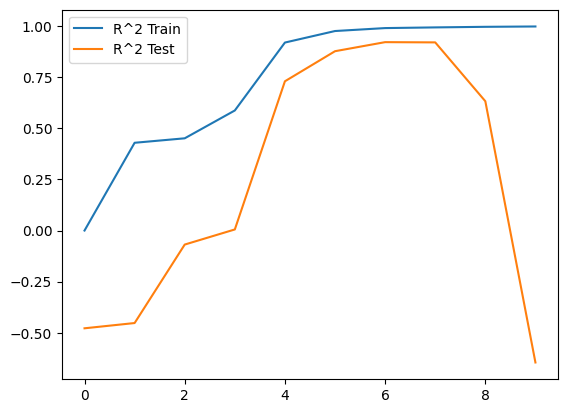

In [ ]:
# Voy a graficar los resultados de answer_two()
r2_train, r2_test = answer_two()
plt.figure()
plt.plot(r2_train, label='R^2 Train')
plt.plot(r2_test, label='R^2 Test')
plt.legend()
plt.show()

In [ ]:
def answer_three():
  # Observando el grafico obtenemos
  return (1, 9, 6)

Usando la gráfica de $R^2$:

**Underfitting:**

Grado 0, El modelo es prácticamente constante

**Overfitting:**

Grado 9, El modelo se ajusta al ruido

**Buena generalización:**

Grado 6, Balance adecuado entre sesgo y varianza

<br>

Este análisis demuestra que:

- Incrementar la complejidad siempre mejora el ajuste en entrenamiento

- El desempeño en prueba es el criterio correcto para seleccionar modelos

- La visualización es una herramienta clave para detectar sobreajuste

- La selección de hiperparámetros es esencial en ML práctico

## De Complejidad Polinomial a Regularización

A mayor complejidad del modelo, mejor ajuste en entrenamiento, pero peor generalización.

En particular:

Modelos polinomiales de alto grado (por ejemplo, grado 9) logran $R^2$ cercano a 1 en entrenamiento, presentan caída significativa en $R^2$ en prueba y una evidencian overfitting, este comportamiento se debe a que el modelo comienza a ajustar el ruido en lugar de la estructura subyacente de los datos.

**¿Podemos usar modelos complejos sin sacrificar generalización?**

La regularización introduce una penalización sobre la magnitud de los coeficientes, forzando al modelo a mantener coeficientes pequeños, ignorar características poco relevantes y reducir la varianza sin reducir drásticamente la complejidad

En esta sección se utilizan características polinomiales de grado 12, se entrena un modelo sin regularización (LinearRegression), un modelo con regularización Lasso y se comparan los valores de $R^2$ en el conjunto de prueba

Esto permite evaluar si la regularización reduce el overfitting, mejora la capacidad de generalización y mantiene buen desempeño predictivo

In [ ]:
def answer_four():
    from sklearn.preprocessing import PolynomialFeatures
    from sklearn.linear_model import Lasso, LinearRegression
    from sklearn.metrics import r2_score
    import numpy as np
    import pandas as pd
    import matplotlib.pyplot as plt
    from sklearn.model_selection import train_test_split

    #Fijamos semillas
    np.random.seed(0)

    # Definimos nuestra muestra
    n = 15
    x = np.linspace(0,10,n) + np.random.randn(n)/5
    y = np.sin(x)+x/6 + np.random.randn(n)/10

    # Dividimos la muestra en 75% entrenamiento y 25% de prueba
    X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=0)

    # Asignamos los grados de libertad para el modelo
    grados = 12

    # Asignamos el polinomio con grado n al polinimo con [1,x,x^2,...,x^n]
    polinomio = PolynomialFeatures(degree=grados)

    # Entrenamos el modelo con el polinimo
    # Ensure X_train is reshaped to 2D before polynomial transformation
    X_train_modelo = polinomio.fit_transform(X_train.reshape(-1, 1))

    # Ajuste del modelo lasso
    modelo_lasso = Lasso(alpha=0.01, max_iter = 10000, tol = 0.1)
    modelo_lasso.fit(X_train_modelo, y_train)

    # Ajuste del modelo Linealregression
    modelo_LinReg = LinearRegression()
    modelo_LinReg.fit(X_train_modelo, y_train)

    # Calculamos los r^2 de cada modelo
    # Ensure X_test is reshaped to 2D before polynomial transformation
    X_test_modelo = polinomio.transform(X_test.reshape(-1, 1))

    LinearRegression_R2_test_score = modelo_LinReg.score(X_test_modelo, y_test)
    Lasso_R2_test_score = modelo_lasso.score(X_test_modelo, y_test)

    return LinearRegression_R2_test_score, Lasso_R2_test_score

In [ ]:
answer_four()

(-4.311996022859516, 0.6051396919570032)

## Resultados

**LinearRegression:**

Alto $R^2$ en entrenamiento

Bajo $R^2$ en prueba

Evidencia clara de overfitting

**Lasso:**

Penaliza coeficientes irrelevantes

Reduce varianza

Mejora el desempeño en prueba

Esto demuestra que el problema del sobreajuste no se resuelve reduciendo la complejidad, sino controlándola, la regularización permite usar modelos expresivos sin perder capacidad de generalización, Lasso actúa como un mecanismo automático de selección de variables

# Part 2 – Classification (SVM, árboles, validación)

## Introducción

En esta segunda parte del laboratorio exploramos problemas de clasificación, donde el objetivo no es predecir un valor continuo, sino asignar una observación a una clase discreta.

A lo largo de esta sección trabajaremos con:

- Support Vector Machines (SVM)

- Árboles de Decisión

- Validación cruzada

- Curvas de validación

Se busca entender, Cómo la complejidad del modelo afecta el desempeño, Cómo los hiperparámetros controlan el sobreajuste y Cómo evaluar correctamente la capacidad de generalización

## Dataset: Mushroom Dataset (UCI)

El conjunto de datos Mushroom proviene del repositorio UCI y contiene descripciones categóricas de hongos, el objetivo es clasificar cada hongo como:

- Comestible

- Venenoso

Este dataset es ideal porque es no lineal, tiene muchas variables categóricas y permite observar claramente overfitting y underfitting

## Parte 2 - Clasificación

El conjunto de Datos de Hongos UCI](http://archive.ics.uci.edu/ml/datasets/Mushroom?ref=datanews.io) esta almacenado en `mushrooms.csv`. Se proporcionan los siguientes atributos:

*Información del atributo:*

1. Forma del sombrero: acampanado=b, cónico=c, convexo=x, plano=f, nudoso=k, hundido=s
2. Superficie del sombrero: fibroso=f, ranurado=g, escamoso=y, liso=s
3. Color del sombrero: marrón=n, beige=b, canela=c, gris=g, verde=r, rosa=p, morado=u, rojo=e, blanco=w, amarillo=y
4. ¿Magulladuras?: magulladuras=t, sin=f
5. Olor: almendra=a, anís=l, creosota=c, a pescado=y, fétido=f, mohoso=m, ninguno=n, acre=p, picante=s
6. Fijación branquial: fijada=a, descendente=d, libre=f, con muescas=n
7. Espaciamiento branquial: cerca=c, apiñada=w, distante=d
8. Tamaño de las branquias: anchas=b, estrechas=n
9. Color de las branquias: negras=k, marrones=n, beige=b, chocolate=h, grises=g, verdes=r, naranja=o, rosas=p, moradas=u, rojas=e, blancas=w, amarillas=y
10. Forma del tallo: alargadas=e, estrechas=t
11. Raíz del tallo: bulbosas=b, mazas=c, copa=u, iguales=e, rizomorfos=z, enraizadas=r, faltantes=?

12. superficie del tallo por encima del anillo: fibroso=f, escamoso=y, sedoso=k, liso=s
13. superficie del tallo por debajo del anillo: fibroso=f, escamoso=y, sedoso=k, liso=s
14. color del tallo por encima del anillo: marrón=n, beige=b, canela=c, gris=g, naranja=o, rosa=p, rojo=e, blanco=w, amarillo=y
15. color del tallo por debajo del anillo: marrón=n, beige=b, canela=c, gris=g, naranja=o, rosa=p, rojo=e, blanco=w, amarillo=y
16. tipo de velo: parcial=p, universal=u
17. color del velo: marrón=n, naranja=o, blanco=w, amarillo=y
18. número de anillos: ninguno=n, uno=o, dos=t
19. tipo de anillo: Telaraña=c, evanescente=e, ensanchado=f, grande=l, ninguno=n, colgante=p, envainado=s, zona=z
20. Color de la huella de esporas: negro=k, marrón=n, beige=b, chocolate=h, verde=r, naranja=o, morado=u, blanco=w, amarillo=y
21. Población: abundante=a, agrupada=c, numerosa=n, dispersa=s, varias=v, solitaria=y
22. Hábitat: pastos=g, hojas=l, prados=m, senderos=p, urbano=u, residuos=w, bosques=d

<br>

Los datos del conjunto de datos de hongos están codificados actualmente con cadenas. Estos valores deberán codificarse a valores numéricos para funcionar con sklearn. Usaremos pd.get_dummies para convertir las variables categóricas en variables indicadoras.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split


mush_df = pd.read_csv('/content/mushrooms.csv')
mush_df2 = pd.get_dummies(mush_df)

X_mush = mush_df2.iloc[:,2:]
y_mush = mush_df2.iloc[:,1]


X_train2, X_test2, y_train2, y_test2 = train_test_split(X_mush, y_mush, random_state=0)

## Árboles de Decisión

Un árbol de decisión divide el espacio de características mediante reglas del tipo $x_j < t$

En cada nodo se elige la división que maximiza la reducción de impureza, usualmente medida con: Gini y Entropía

Entre sus ventajas es que son interpretables, no requieren escalamiento y  capturan relaciones no lineales y su desventaja es que es muy propensos al overfitting

In [ ]:
def answer_five():
    from sklearn.tree import DecisionTreeClassifier

    #Entreno al modelo para un arbol de decision con parametros determinados
    clf = DecisionTreeClassifier(random_state=0).fit(X_train2, y_train2)

    #Voy a crear una lista con los 5 nombres más importantes en orden descendente
    caracteristicas = X_mush.columns
    importancia = clf.feature_importances_
    indices = np.argsort(importancia)[::-1]
    top5 = [caracteristicas[i] for i in indices[:5]]

    return top5

In [ ]:
answer_five()

['odor_n', 'stalk-root_c', 'stalk-root_r', 'spore-print-color_r', 'odor_l']

Interpretación

El árbol identifica atributos altamente informativos (por ejemplo, odor, spore-print-color)

Sin restricciones, el árbol tiende a memorizar los datos

Es fundamental controlar la profundidad o el tamaño mínimo de hojas

## Support Vector Machines (SVM)

Idea central

SVM busca encontrar un hiperplano que maximice el margen entre clases:

$$w^Tx+b =0 $$

Solo los puntos más cercanos al margen (vectores soporte) influyen en la frontera.

## Validación cruzada

Una sola división train/test puede ser engañosa, la validación cruzada permite estimar mejor el desempeño promedio del modelo.

En k-fold cross-validation se divide el dataset en k partes, se entrena k veces y cada parte actúa una vez como test. Esto mejora la estimación de generalización y aumenta el costo computacional

In [ ]:
def answer_six():
    from sklearn.svm import SVC
    from sklearn.model_selection import validation_curve

    param_range = np.logspace(-4, 1, 6)
    train_scores, test_scores = validation_curve(SVC(kernel='rbf', C=1,random_state=0), X_mush, y_mush, param_name='gamma',
                                            param_range=param_range, cv=3, n_jobs=2)

    training_scores = np.mean(train_scores, axis=1)
    test_scores = np.mean(test_scores, axis=1)

    return training_scores, test_scores


In [ ]:
answer_six()

(array([0.89838749, 0.98104382, 0.99895372, 1.        , 1.        ,
        1.        ]),
 array([0.88749385, 0.82951748, 0.84170359, 0.86582964, 0.83616445,
        0.51797144]))

### Interpretación del comportamiento observado

**Gamma pequeño:**

Frontera muy suave

Bajo desempeño → underfitting

**Gamma grande:**

Frontera muy compleja

Alto entrenamiento, bajo test → overfitting

**Gamma intermedio:**

Mejor balance entre sesgo y varianza

Buena generalización

In [ ]:
def answer_seven():
  # Voy a graficar los resultados de answer_six()
  train_scores, test_scores = answer_six()

  plt.figure()
  plt.plot(train_scores, label='R^2 Train')
  plt.plot(test_scores, label='R^2 Test')
  plt.legend()
  plt.show()

  param_range = np.logspace(-4, 1, 6)
  return (param_range[0], param_range[-1], param_range[4])

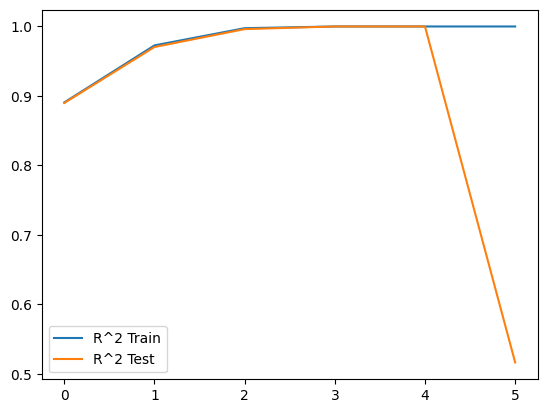

(0.0001, 10, 1)

In [ ]:
answer_seven()

Este laboratorio demuestra que:

- Más complejo no siempre es mejor

- La clave está en el equilibrio entre ajuste y generalización

- La validación cruzada es esencial para modelos confiables

- Comprender los hiperparámetros es tan importante como el modelo